In [51]:
import hddm

In [52]:
hddm.__version__

'0.6.1'

In [57]:
!cp /home/gdholla1/projects/bias/data/behavior/hddm_fits/model_start_point.pickle ./
!cp /home/gdholla1/projects/bias/data/behavior/hddm_fits/traces_start_point.pkl ./

In [58]:
!mdkir /home/gdholla1/projects/bias/notebooks/hddm
!cd /home/gdholla1/projects/bias/notebooks/hddm

/bin/sh: 1: mdkir: not found
/bin/sh: 1: cd: can't cd to /home/gdholla1/projects/bias/notebooks/hddm


In [61]:
data = pandas.read_pickle('/home/gdholla1/projects/bias/data/behavior/behavior.pandas')
data = data[['cue_validity', 'rt', 'correct', 'difficulty', 'subj_idx']]
data['response'] = data['correct']
data['rt'] = data['rt'] / 1000.

data = data[(data.rt > .2) & (data.rt < 1.5)]

data = data[~data.rt.isnull()]
data['cue_coding'] = data.cue_validity.map({'valid':1, 'neutral':0, 'invalid':-1})

def z_link_func(x, data=data):
    return 1 / (1 + np.exp(-(x.values.ravel())))

z_reg = {'model': 'z ~ 0 + cue_coding', 'link_func': z_link_func}
v_reg = {'model': 'v ~ 1 + C(difficulty)', 'link_func': lambda x: x}

reg_descr = [z_reg, v_reg]
model = hddm.HDDMRegressor(data, reg_descr, include='all', group_only_regressors=False, group_only_nodes=['sv', 'st'])
# model.find_starting_values()

Adding these covariates:
['z_cue_coding']
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]']


In [62]:
model.load_db('traces_start_point.pkl', db='pickle')

Plotting a
Plotting a_std
Plotting t
Plotting t_std
Plotting sv
Plotting sz
Plotting st
Plotting p_outlier
Plotting z_cue_coding
Plotting z_cue_coding_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(difficulty)[T.hard]
Plotting v_C(difficulty)[T.hard]_std


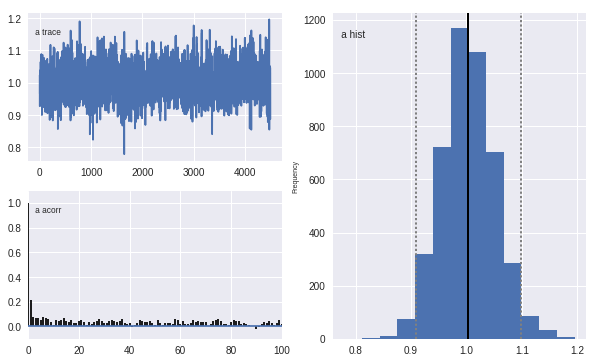

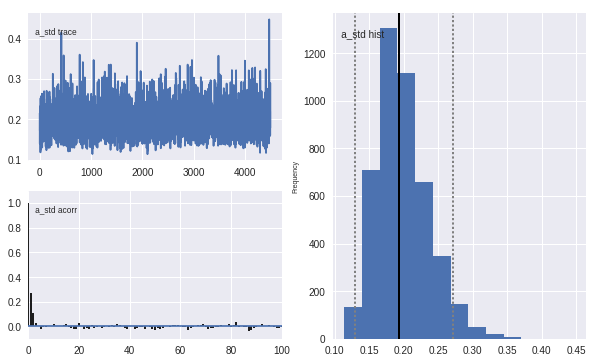

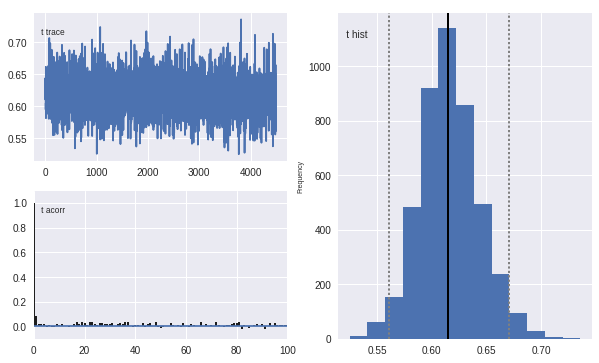

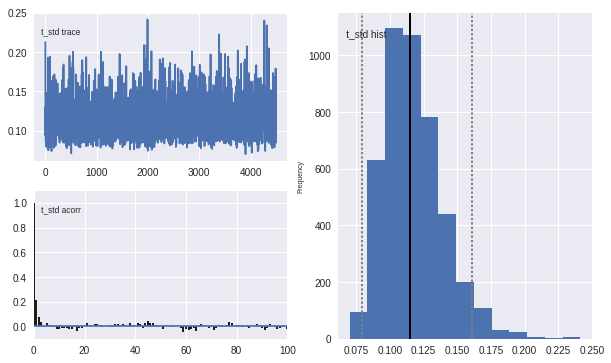

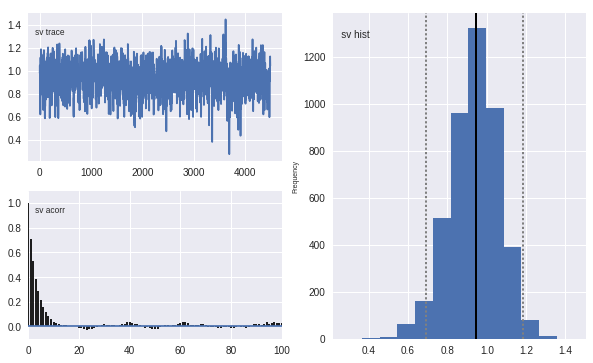

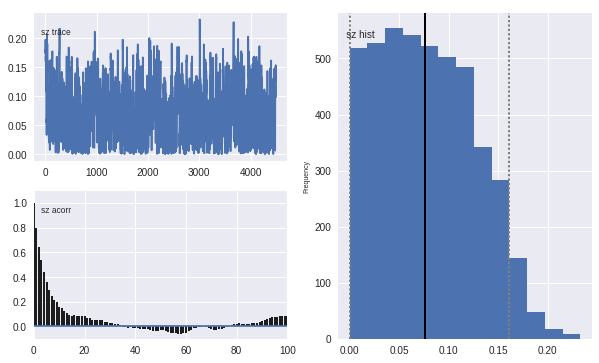

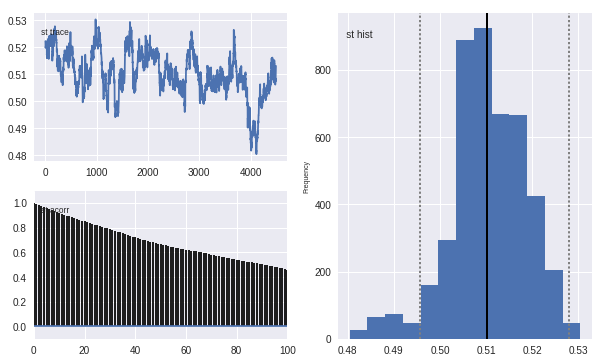

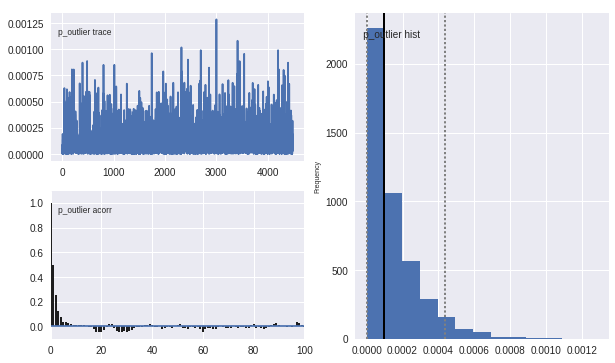

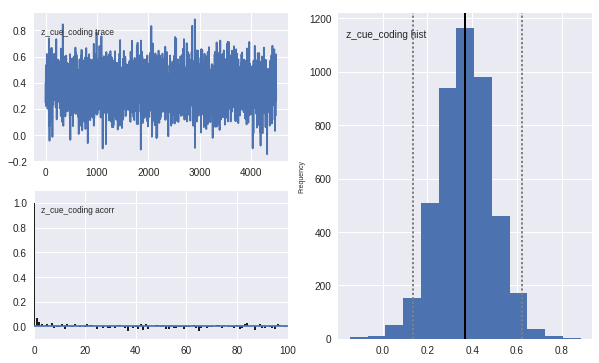

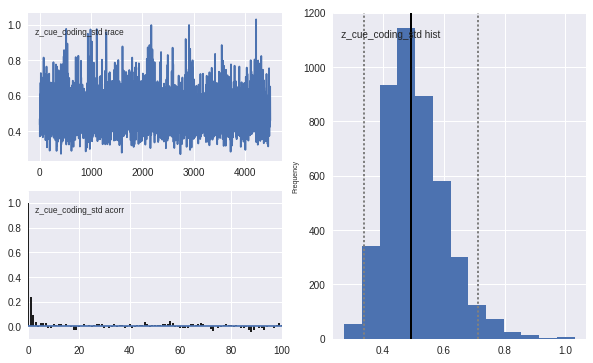

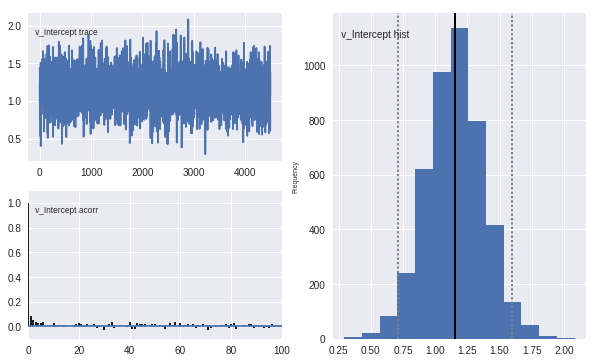

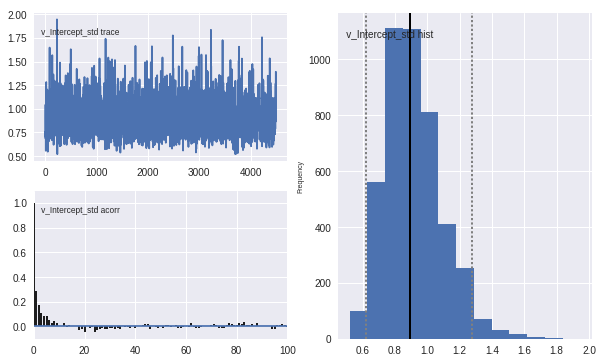

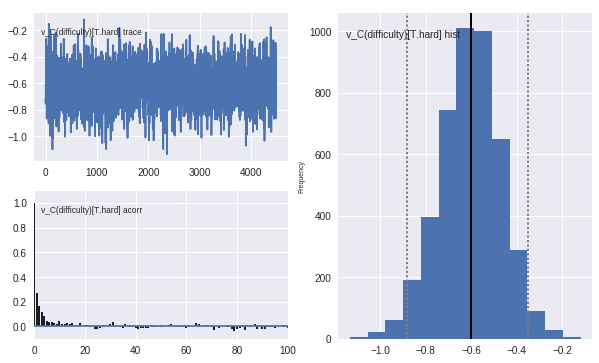

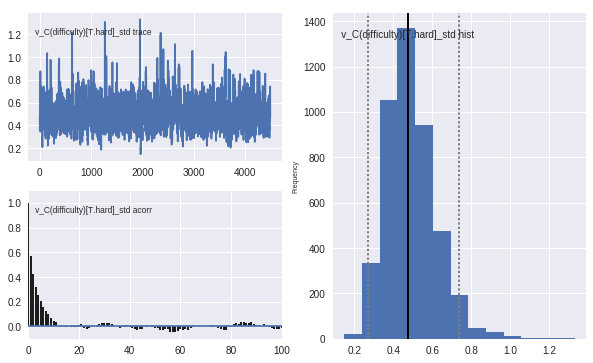

In [63]:
model.plot_posteriors()

In [ ]:
ppc = hddm.utils.post_pred_gen(model, samples=250)

In [69]:
ppc_compare = hddm.utils.post_pred_stats(data, ppc)

In [78]:
ppc.ix[0]

rt    0.785716
Name: (wfpt.1, 0, 768), dtype: float64

In [70]:
ppc_compare

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.642847,0.645439,0.111146,0.000007,0.012360,True,52.631580,0.023323
mean_ub,0.826383,0.835888,0.069185,0.000090,0.004877,True,47.368420,0.137384
std_ub,0.198155,0.241916,0.058894,0.001915,0.005384,True,18.421053,0.743034
10q_ub,0.587000,0.550216,0.082343,0.001353,0.008133,True,65.789474,0.446719
30q_ub,0.720000,0.696639,0.075164,0.000546,0.006195,True,63.157894,0.310797
50q_ub,0.820000,0.811304,0.073490,0.000076,0.005476,True,50.000000,0.118331
70q_ub,0.924000,0.934037,0.073229,0.000101,0.005463,True,42.105263,0.137070
90q_ub,1.089000,1.137666,0.098159,0.002368,0.012004,True,28.947369,0.495785
mean_lb,-0.856852,-0.852513,0.078144,0.000019,0.006125,True,47.368420,0.055533


In [88]:
tmp = data.merge(ppc.set_index(ppc.index.get_level_values(2)), left_index=True, right_index=True, how='outer')

In [95]:
tmp['rt_predicted'] = np.abs(tmp['rt_y'])
tmp['response_predicted'] = np.sign(tmp['rt_y']).map({-1:0, 1:1})

In [96]:
tmp.groupby(['difficulty']).mean()

,rt_x,correct,subj_idx,response,cue_coding,rt_y,rt_predicted,response_predicted
difficulty,,,,,,,,
easy,0.823358,0.686511,10.161634,0.686511,-0.002876,0.315195,0.832857,0.693558
hard,0.851168,0.599195,10.169925,0.599195,0.000575,0.156556,0.848660,0.594595


In [102]:
ppc.set_index(ppc.index.get_level_values(1)

SyntaxError: unexpected EOF while parsing (<ipython-input-102-01a87114e7c9>, line 1)

In [72]:
data['rt_predicted'] = np.abs(ppc.set_index(ppc.index.get_level_values(1))['rt'])
data['response_predicted'] = np.sign(ppc.set_index(ppc.index.get_level_values(1))['rt'])
data['response'] = data.response

,rt
0,0.785716
0,0.789573
0,0.923616
0,0.956807
0,-0.670908
0,0.573551
0,0.680432
0,-0.889474
0,-0.729467
0,1.154630
